# 机器学习工程师纳米学位
## 深度学习
## 项目：搭建一个数字识别项目

在此文件中，我们提供给你了一个模板，以便于你根据项目的要求一步步实现要求的功能，进而完成整个项目。如果你认为需要导入另外的一些代码，请确保你正确导入了他们，并且包含在你的提交文件中。以**'练习'**开始的标题表示接下来你将开始实现你的项目。注意有一些练习是可选的，并且用**'可选'**标记出来了。

在此文件中，有些示例代码已经提供给你，但你还需要实现更多的功能让项目成功运行。除非有明确要求，你无须修改任何已给出的代码。以'练习'开始的标题表示接下来的代码部分中有你必须要实现的功能。每一部分都会有详细的指导，需要实现的部分也会在注释中以'TODO'标出。请仔细阅读所有的提示！

除了实现代码外，你还必须回答一些与项目和你的实现有关的问题。每一个需要你回答的问题都会以**'问题 X'**为标题。请仔细阅读每个问题，并且在问题后的**'回答'**文字框中写出完整的答案。我们将根据你对问题的回答和撰写代码所实现的功能来对你提交的项目进行评分。

>**注意：** Code 和 Markdown 区域可通过 **Shift + Enter** 快捷键运行。此外，Markdown可以通过双击进入编辑模式。

## 连接 mnist 的字符来合成数据

你可以通过连接[MNIST](http://yann.lecun.com/exdb/mnist/)的字符来合成数据来训练这个模型。为了快速导入数据集，我们可以使用 [Keras Datasets](https://keras.io/datasets/#mnist-database-of-handwritten-digits) [中文文档](http://keras-cn.readthedocs.io/en/latest/other/datasets/#mnist)。

### 载入 mnist

In [1]:
from keras.datasets import mnist

(X_raw, y_raw), (X_raw_test, y_raw_test) = mnist.load_data()

n_train, n_test = X_raw.shape[0], X_raw_test.shape[0]

Using TensorFlow backend.


### 可视化 mnist

我们可以通过 matplotlib 来可视化我们的原始数据集。

/Users/fanfan/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


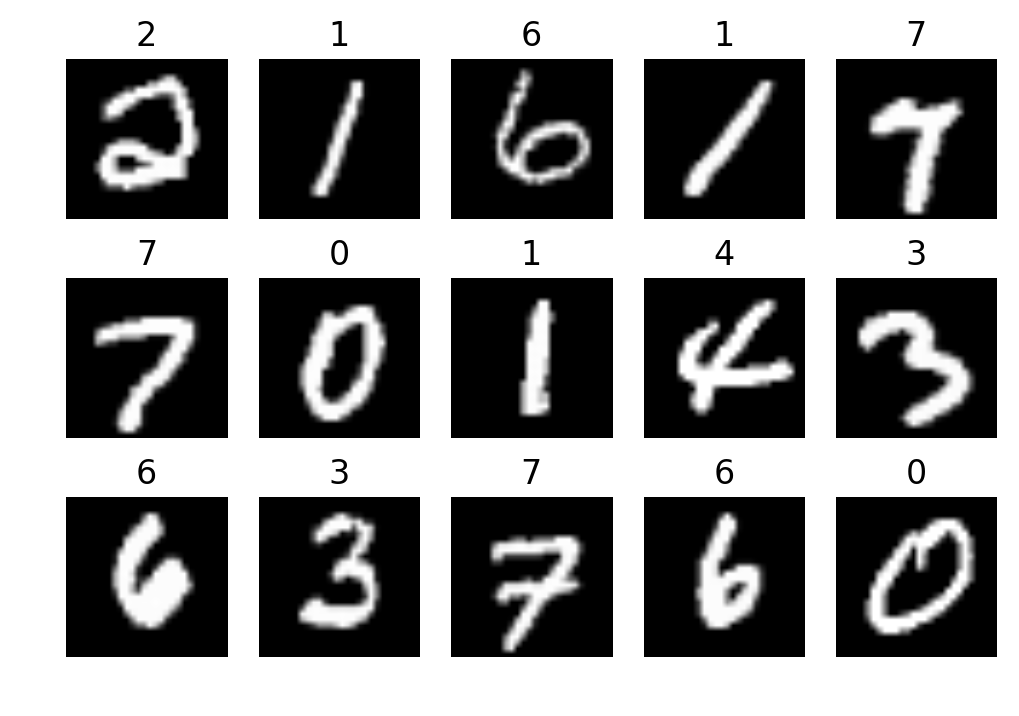

In [2]:
import matplotlib.pyplot as plt
import random

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

for i in range(15):
    plt.subplot(3, 5, i+1)
    index = random.randint(0, n_train-1)
    plt.title(str(y_raw[index]))
    plt.imshow(X_raw[index], cmap='gray')
    plt.axis('off')

### 练习：合成数据

你需要随机取随机张图片，然后将它们拼接成新的图片。


In [3]:
import numpy as np

n_class, n_len, width, height = 11, 5, 28, 28

def generate_dataset(X, y):
    X_len = X.shape[0]
    
    X_gen = np.zeros((X_len, height, width*n_len, 1), dtype=np.uint8)
    y_gen = [np.zeros((X_len, n_class), dtype=np.uint8) for i in range(n_len)]
    # TODO: 随机取1~5个数字，并拼接成新的图片
    for i in range(X_len):
        digit_num = random.randint(1,n_len)
        for j in range(n_len):
            if j < digit_num:
                idx = random.randint(0, X_len -1)
                X_gen[i,:,j*width:(j+1)*width,0] = X[idx]
                y_gen[j][i,y[idx]] =  1
            else:
                y_gen[j][i,n_class-1] =  1
    
    
    return X_gen, y_gen

X_train, y_train = generate_dataset(X_raw, y_raw)
X_test, y_test = generate_dataset(X_raw_test, y_raw_test)

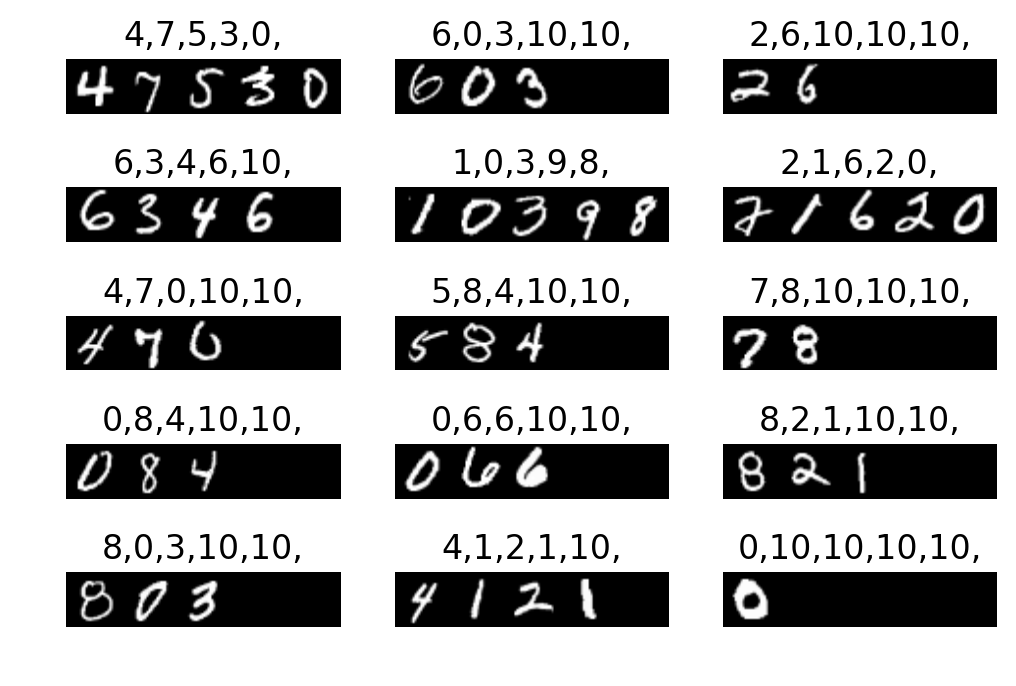

In [4]:
# 显示生成的图片
for i in range(15):
    plt.subplot(5, 3, i+1)
    index = random.randint(0, n_test-1)
    title = ''
    for j in range(n_len):
        title += str(np.argmax(y_test[j][index])) + ','
    
    plt.title(title)
    plt.imshow(X_test[index][:,:,0], cmap='gray')
    plt.axis('off')

### 问题 1
_你是如何合成数据集的？_

**回答：**

从1至5中随机抽取一个数字，作为需要生成的数字个数n。再从相应的集合中（分为训练集和测试集）抽取n个数字排在一起，剩下的5-n个位置用元素为0的矩阵代替。这样便生成了对应的训练集和测试集数据。相应的标签进行one-hot编码。空的数据对应对应着第十一个类别，idx为10.

### 练习：设计并测试一个模型架构

设计并实现一个能够识别数字序列的深度学习模型。为了产生用于测试的合成数字序列，你可以进行如下的设置：比如，你可以限制一个数据序列最多五个数字，并在你的深度网络上使用五个分类器。同时，你有必要准备一个额外的“空白”的字符，以处理相对较短的数字序列。

在思考这个问题的时候有很多方面可以考虑：

- 你的模型可以基于深度神经网络或者是卷积神经网络。
- 你可以尝试是否在每个分类器间共享权值。
- 你还可以在深度神经网络中使用循环网络来替换其中的分类层，并且将数字序列里的数字一个一个地输出。

在使用 Keras 搭建模型的时候，你可以使用 [泛型模型](http://keras-cn.readthedocs.io/en/latest/models/model/) 的方式来搭建多输出模型。

In [5]:
from keras.models import Model
from keras.layers import *
from keras.layers.normalization import BatchNormalization

# TODO: 构建你的模型
digit_input = Input(shape = (height, width*n_len, 1))
x = Convolution2D(32,3,3)(digit_input)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D()(x)
x = Convolution2D(64,3,3)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D()(x)
x = Convolution2D(128,3,3)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D()(x)
x = Flatten()(x)
x = BatchNormalization()(x)
features = Dropout(0.5)(x)

output = []
for i in range(n_len):
    output.append(Dense(n_class, activation='softmax')(features))
    
model = Model(input = digit_input, output=output)
model.compile(loss='categorical_crossentropy',
              optimizer='RMSprop',
              metrics=['accuracy'])

### 问题 2
_你为解决这个问题采取了什么技术？请详细介绍你使用的技术。_

**回答：** 

使用了卷积神经网络，卷积是深度学习在图像识别中最常用的一种技术。它的权值共享的结构降低了网络模型的复杂度，减少了权值的数量。同时池化层通过在每个patch中取最大值能进一步压缩网络的大小，是能够在较少的参数下构建更复杂的模型，提取出高水平的特征。通过它还利用了图片中平移不变性的特性。

Dropout:在训练的模型的过程中，随机去掉一些节点进行训练，这样可以避免节点之间过分的互相依赖，可提高的模型的稳健性，有效防止过拟合。

BatchNormalization：在BatchNormalization中的层，对每个特征计算该batch的均值和方差，对该特征进行标准化。这样使得激活值处在一个合理的范围内，能有效防止反向求导出现梯度消失和梯度爆炸的情况，也有效减少了对小心进行参数初始化的依赖，是一种非常好用的训练神经网络的技术。

使用了keras中的泛型模型，好处是能够处理多输入多输出的问题，很适用这里的问题。共享了卷积层的同时，得到不同的输出。

隐藏层的激活函数使用了relu，是一个分段线性函数，其导数有非常好的性质，分段常数，好处是训练速度快，能有效解决梯度消失的问题。

输出层的激活函数使用了softmax，可以输出值转化成类别的概率，求导方便，通过有很好的对应的损失函数用于训练。

训练方法使用了RMSprop，可以在mini-batch learning对不同的参数自适应的调整步长。能够有效的提升训练效果。

### 可视化你的网络模型

参考链接：[visualization](http://keras-cn.readthedocs.io/en/latest/other/visualization/)

可以是 PNG 格式，也可以是 SVG 格式。

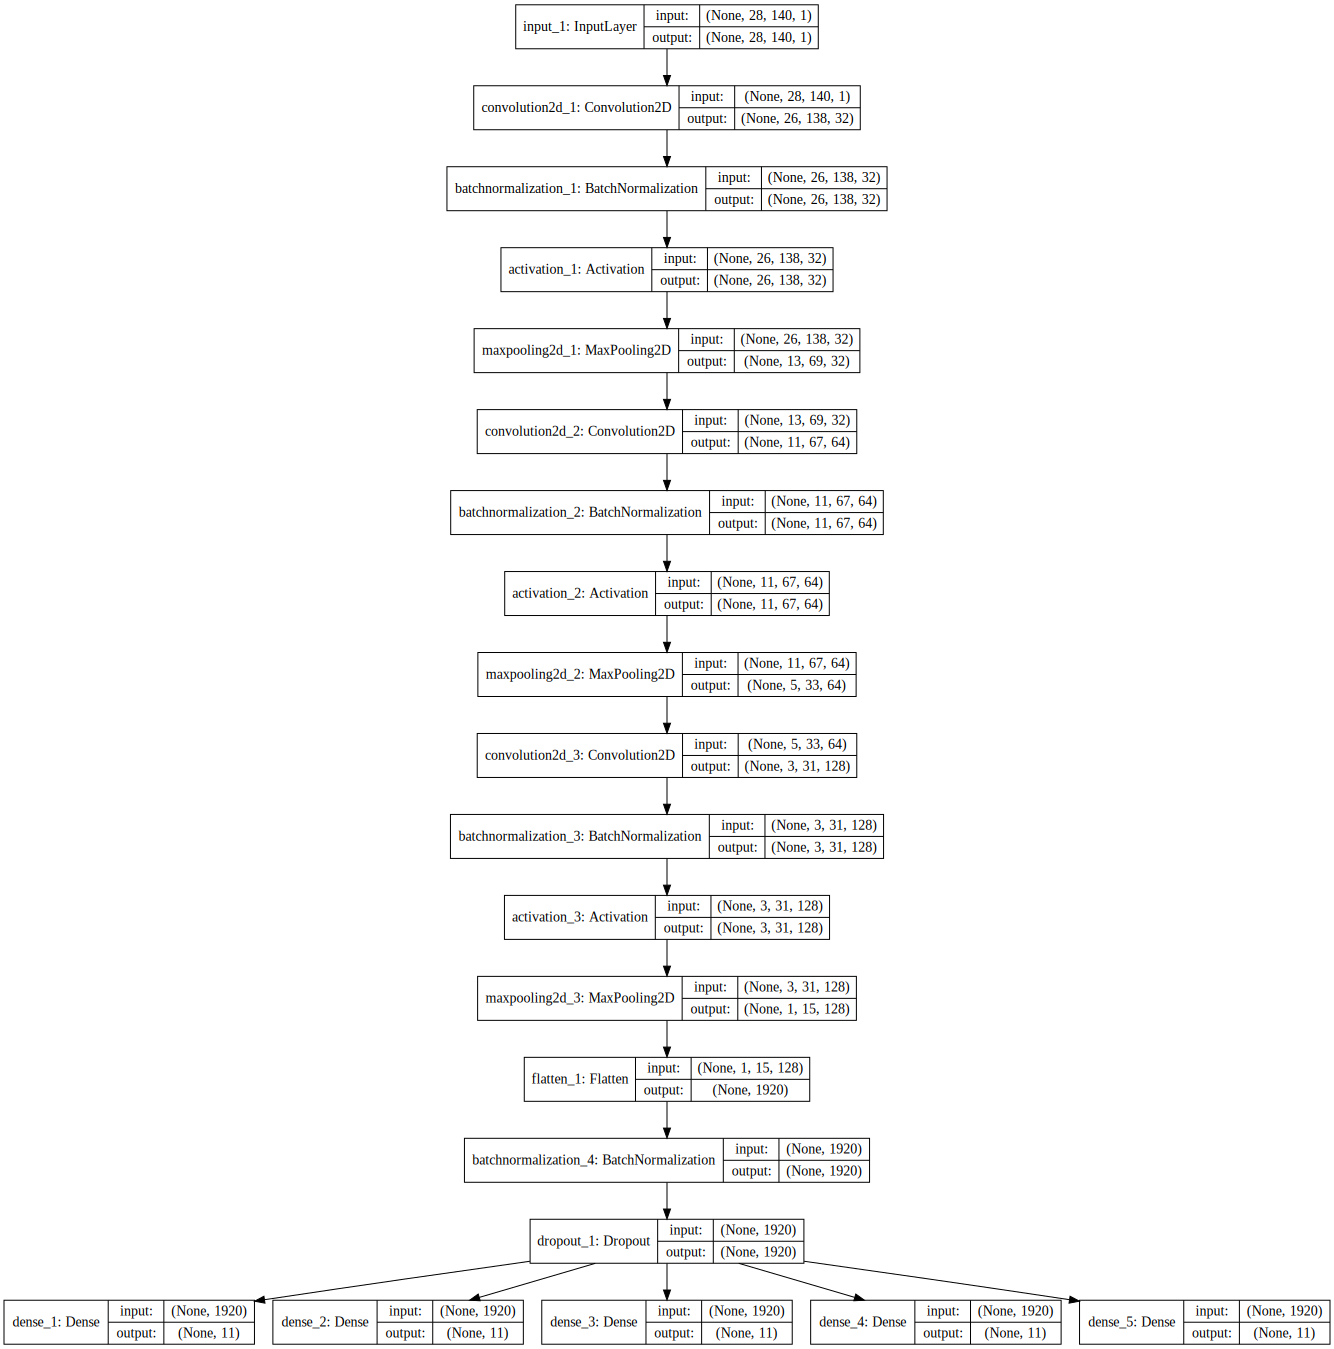

In [6]:
from keras import utils
from keras.utils.visualize_util import plot, model_to_dot
from IPython.display import Image, SVG

# TODO: 可视化你的模型
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

### 问题 3
_你最终的模型架构是什么样的？（什么类型的模型，层数，大小, 如何连接等）_

**回答：**

类型：多输出的卷积神经网络。

首先是feature map为32的卷积层，使用了3X3的卷积核，之后为BN层，使训练能够有效进行，后面加上激活函数relu， 然后使用maxpooling层。后面再使用feature map为64， 128的卷积层，BN层，激活层，和pooling层各做一次。之后将所以的特征拉成一维的特征向量，加上dropout层防止过拟合。最后套上五个不同的激活函数为softmax的全连接层。得到5个不同的输出。

### 练习：训练你的网络模型

你需要设置20%的数据作为验证集，以保证模型没有过拟合。

In [7]:
# TODO: 训练你的模型
model.fit(X_train, y_train,
          batch_size=128,
          nb_epoch=15,
          verbose=1,
          validation_split = 0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/15
48000/48000 [==============================] - 1194s - loss: 1.5582 - dense_1_loss: 0.3942 - dense_2_loss: 0.3278 - dense_3_loss: 0.2871 - dense_4_loss: 0.2416 - dense_5_loss: 0.3076 - dense_1_acc: 0.8806 - dense_2_acc: 0.9007 - dense_3_acc: 0.9138 - dense_4_acc: 0.9300 - dense_5_acc: 0.9179 - val_loss: 0.3372 - val_dense_1_loss: 0.0886 - val_dense_2_loss: 0.0842 - val_dense_3_loss: 0.0505 - val_dense_4_loss: 0.0575 - val_dense_5_loss: 0.0565 - val_dense_1_acc: 0.9729 - val_dense_2_acc: 0.9742 - val_dense_3_acc: 0.9850 - val_dense_4_acc: 0.9832 - val_dense_5_acc: 0.9837
Epoch 2/15
48000/48000 [==============================] - 1176s - loss: 0.3559 - dense_1_loss: 0.0978 - dense_2_loss: 0.0736 - dense_3_loss: 0.0688 - dense_4_loss: 0.0540 - dense_5_loss: 0.0617 - dense_1_acc: 0.9705 - dense_2_acc: 0.9778 - dense_3_acc: 0.9800 - dense_4_acc: 0.9843 - dense_5_acc: 0.9824 - val_loss: 0.2144 - val_dense_1_loss: 0.0622 - val_dense_

### 练习：计算你的模型准确率

我们刚才得到了模型每个数字的准确率，现在让我们来计算整体准确率，按照完全预测正确数字序列的标准来计算。

比如 1,2,3,10,10 预测成了 1,2,10,10,10 算错，而不是算对了80%。

In [8]:
def evaluate(model):
    # TODO: 按照错一个就算错的规则计算准确率
    pred = model.predict(X_test)
    num = X_test.shape[0]
    accuracy_matrix = np.zeros((num, n_len))
    for row in range(num):
        for col in range(n_len):
            accuracy_matrix[row, col] = np.argmax(pred[col][row,:]) == np.argmax(y_test[col][row,:])
    return np.sum(np.sum(accuracy_matrix,axis = 1) == 5)*1.0/num
evaluate(model)

0.95530000000000004

### 问题 4

_你的模型准确率有多少？你觉得你的模型足以解决问题吗？_

**回答：**

有95.5%的准确率。模型的准确率不错，其中识别出单个数字的准确率达到99%以上。说明模型是可行的，能解决实际的问题。

### 预测值可视化

我们将模型的预测结果和真实值画出来，观察真实效果。

(-0.5, 139.5, 27.5, -0.5)

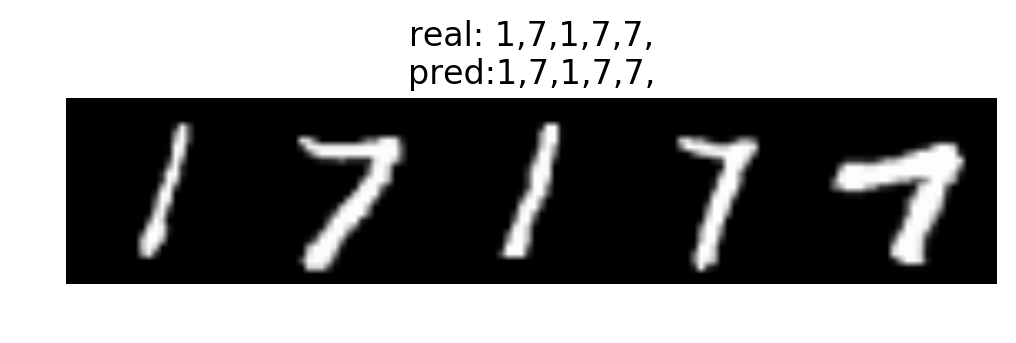

In [9]:
def get_result(result):
    # 将 one_hot 编码解码
    resultstr = ''
    for i in range(n_len):
        resultstr += str(np.argmax(result[i])) + ','
    return resultstr

index = random.randint(0, n_test-1)
y_pred = model.predict(X_test[index].reshape(1, height, width*n_len, 1))

plt.title('real: %s\npred:%s'%(get_result([y_test[x][index] for x in range(n_len)]), get_result(y_pred)))
plt.imshow(X_test[index,:,:,0], cmap='gray')
plt.axis('off')

### 保存模型

模型达到满意的效果以后，我们需要将模型的权值和结构保存，以便下次调用。

In [10]:
model.save_weights('model.h5')
with open('model.json', 'w') as f:
    f.write(model.to_json())